### Deliverable 1: Preprocessing the Data for a Neural Network

In [2]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import sklearn as skl




#  Import and read the charity_data.csv.
import pandas as pd 
df = pd.read_csv("charity_data.csv")
df.head(5)

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
df = df.drop(["EIN", "NAME", "STATUS", "INCOME_AMT", "SPECIAL_CONSIDERATIONS", "USE_CASE"], axis = 1)

In [4]:
df.head(1)

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,ORGANIZATION,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,Association,5000,1


In [5]:
# Determine the number of unique values in each column.
df.nunique()

APPLICATION_TYPE      17
AFFILIATION            6
CLASSIFICATION        71
ORGANIZATION           4
ASK_AMT             8747
IS_SUCCESSFUL          2
dtype: int64

In [6]:
# Look at APPLICATION_TYPE value counts for binning
APP_COUNTS = df["APPLICATION_TYPE"].value_counts()
APP_COUNTS

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T15        2
T29        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

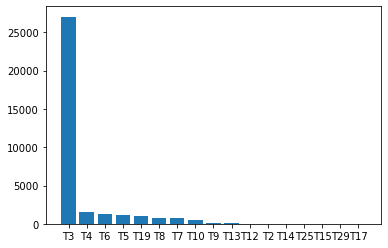

In [7]:
# Visualize the value counts of APPLICATION_TYPE

data = APP_COUNTS
plt.bar(["T3", "T4", "T6", "T5", "T19", "T8", "T7", "T10", "T9", "T13", "T12", "T2", "T14", "T25", "T15", "T29", "T17"], data)
plt.show()


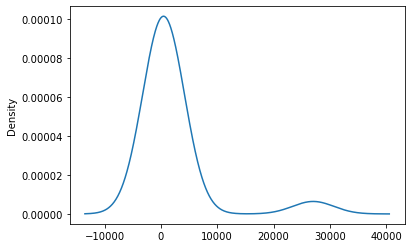

In [8]:
#create density plot to visualize value counts to determine where the cut off is for grouping

APP_COUNTS.plot.density()

In [9]:
# Look at APPLICATION_TYPE value counts for binning
APP_COUNTS = df["APPLICATION_TYPE"].value_counts()
APP_COUNTS

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T15        2
T29        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [10]:

# Determine which values to replace if counts are less than ...
replace_apps = list(APP_COUNTS[APP_COUNTS<500].index)
replace_apps

# Replace in dataframe
for app in replace_apps:
    df.APPLICATION_TYPE = df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [11]:
# Look at CLASSIFICATION value counts for binning
CLASS_COUNTS = df["CLASSIFICATION"].value_counts()
CLASS_COUNTS.tail(50)

C7120    18
C1500    16
C1800    15
C6000    15
C1250    14
C8200    11
C1238    10
C1278    10
C1237     9
C1235     9
C7210     7
C4100     6
C1720     6
C2400     6
C1257     5
C1600     5
C0        3
C1260     3
C2710     3
C1267     2
C3200     2
C1256     2
C1234     2
C1246     2
C1248     1
C8210     1
C1580     1
C1728     1
C1283     1
C4200     1
C2380     1
C1236     1
C2150     1
C1820     1
C2190     1
C2500     1
C2570     1
C2170     1
C2600     1
C6100     1
C1732     1
C1900     1
C4500     1
C4120     1
C1370     1
C3700     1
C2561     1
C1570     1
C1245     1
C5200     1
Name: CLASSIFICATION, dtype: int64

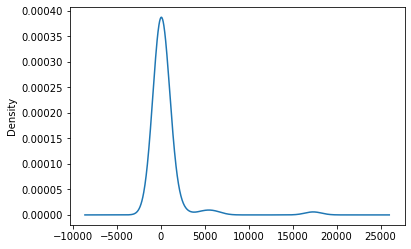

In [12]:
# Visualize the value counts of CLASSIFICATION
CLASS_COUNTS.plot.density()

In [13]:
# Determine which values to replace if counts are less than 300 ..?

replace_class = list(CLASS_COUNTS[CLASS_COUNTS<100].index)
replace_class

# Replace in dataframe
for cls in replace_class:
    df["CLASSIFICATION"] = df["CLASSIFICATION"].replace(cls,"Other")
    
# Check to make sure binning was successful
df["CLASSIFICATION"].value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
Other      669
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
Name: CLASSIFICATION, dtype: int64

In [14]:
# Generate our categorical variable lists
df_cat = df.dtypes[df.dtypes =="object"].index.tolist()
df_cat

['APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION', 'ORGANIZATION']

In [15]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(df[df_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(df_cat)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,CLASSIFICATION_C2700,CLASSIFICATION_C3000,CLASSIFICATION_C4000,CLASSIFICATION_C5000,CLASSIFICATION_C7000,CLASSIFICATION_Other,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [16]:
# Merge one-hot encoded features and drop the originals
df = df.merge(encode_df,left_index=True, right_index=True)
df = df.drop(df_cat,1)
df.head()



,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,...,CLASSIFICATION_C2700,CLASSIFICATION_C3000,CLASSIFICATION_C4000,CLASSIFICATION_C5000,CLASSIFICATION_C7000,CLASSIFICATION_Other,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust
0,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


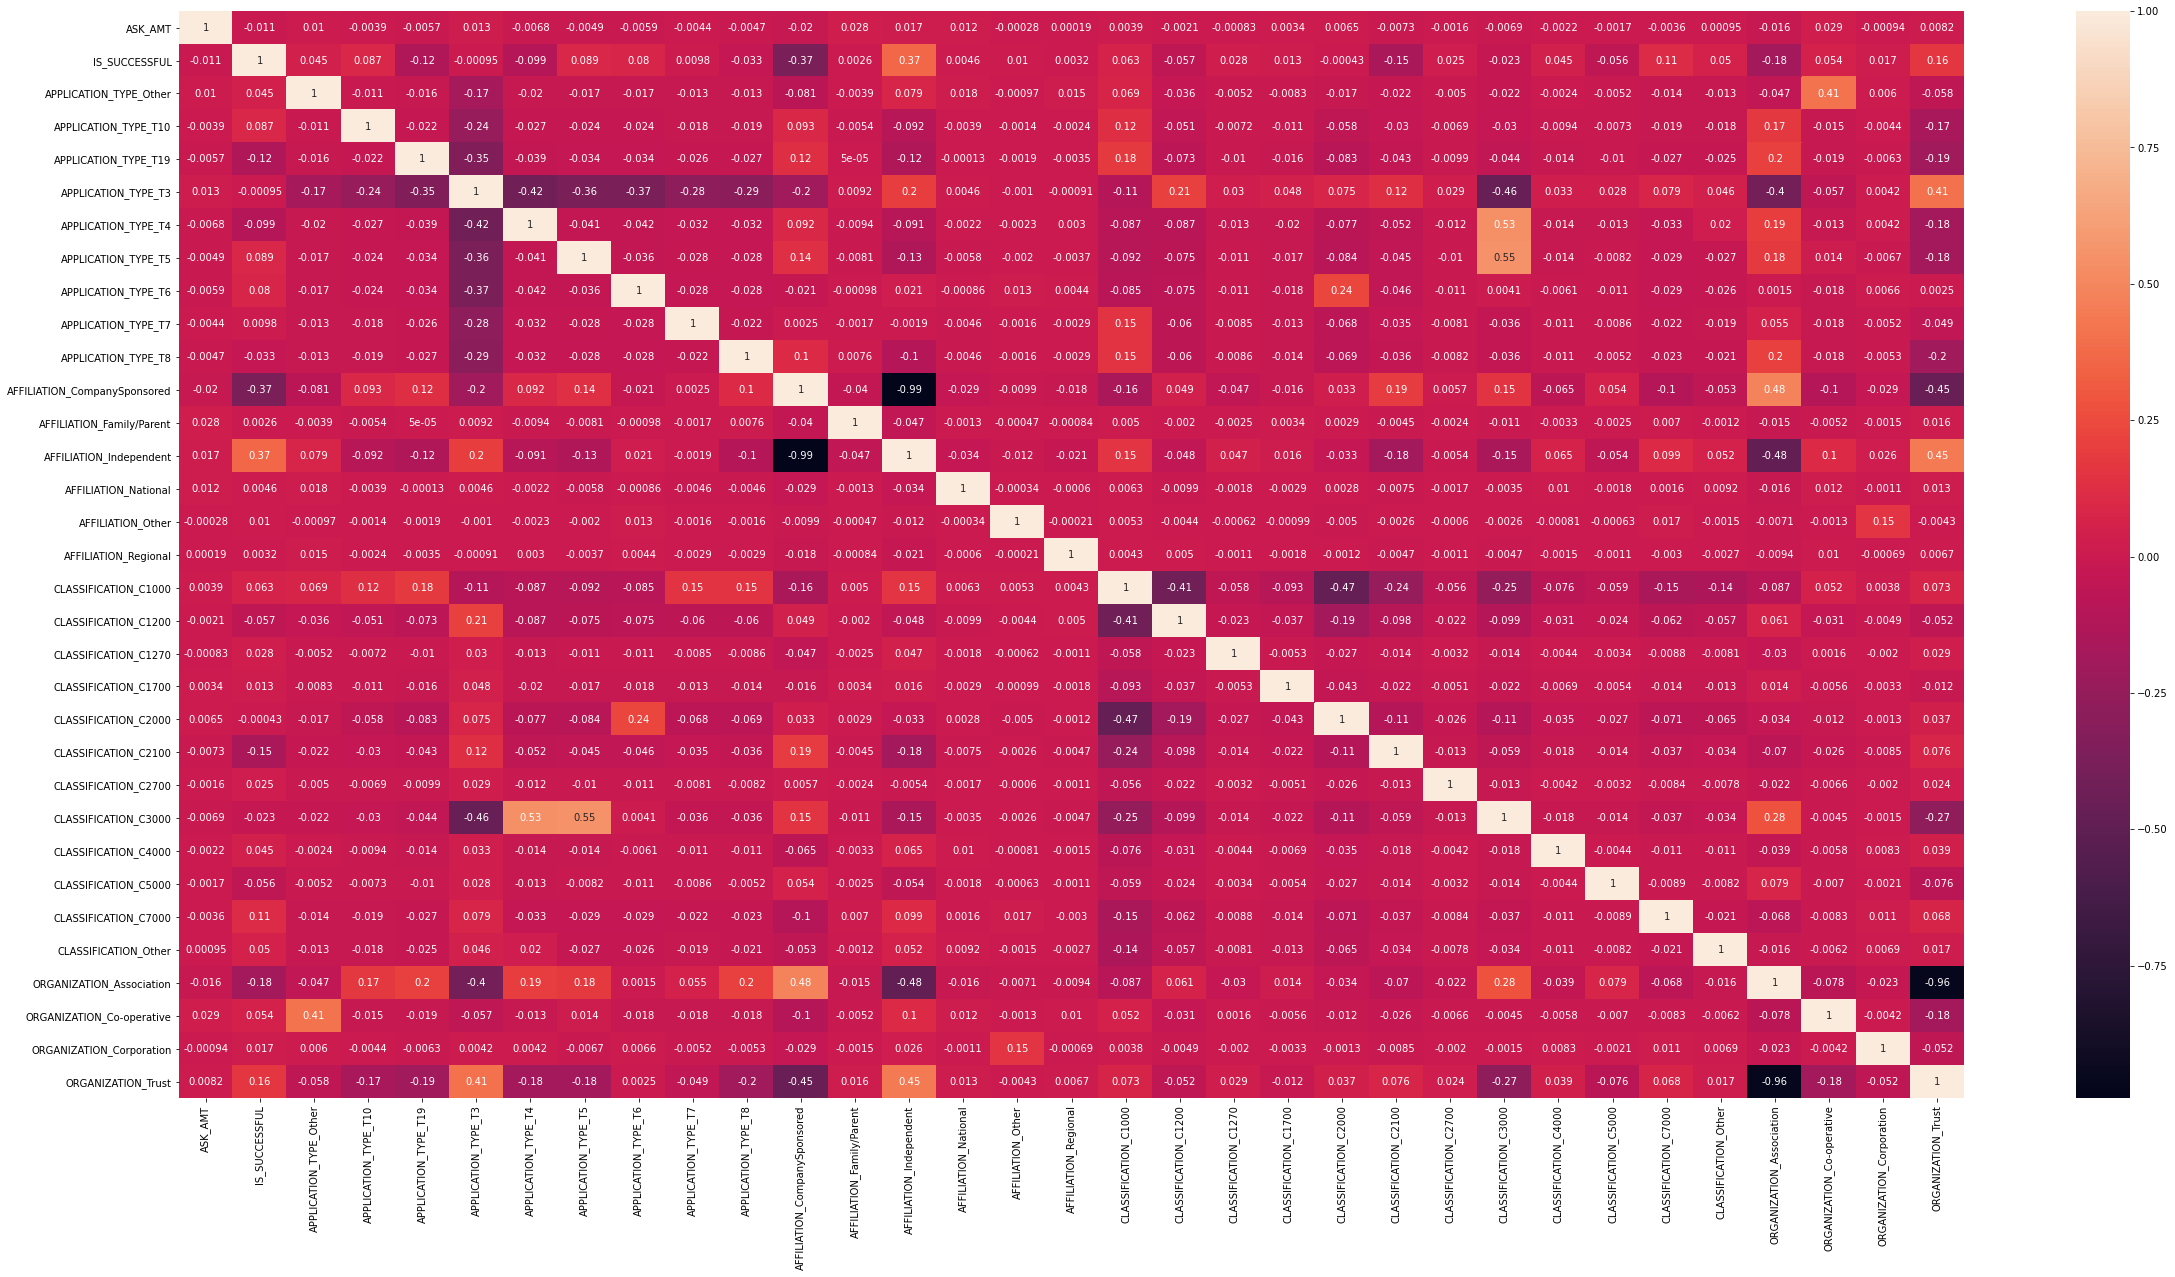

In [17]:
corrMatrix = df.corr()
plt.figure(figsize=(40,20))
sns.heatmap(corrMatrix, annot=True)

plt.show()

In [18]:
# Split our preprocessed data into our features and target arrays
y = df["IS_SUCCESSFUL"]
X = df.drop(["IS_SUCCESSFUL"], axis = 1)


# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [19]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Deliverable 2: Compile, Train and Evaluate the Model

In [20]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 =  16
hidden_nodes_layer2 = 12
hidden_nodes_layer3 = 8


nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, 
                             activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="swish"))
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="swish"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the Sequential model together and customize metrics
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

#checkpoints are for non having to re-run the model every time or storing results somewhere
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=1000)

# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100, callbacks=[cp_callback])


# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")
nn.summary()

Epoch 1/100
804/804 [==============================] - 1s 831us/step - loss: 0.6445 - accuracy: 0.6152
Epoch 2/100
176/804 [=====>........................] - ETA: 0s - loss: 0.5638 - accuracy: 0.7273
Epoch 00002: saving model to checkpoints\weights.02.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5644 - accuracy: 0.7257
Epoch 3/100
380/804 [=============>................] - ETA: 0s - loss: 0.5510 - accuracy: 0.7374
Epoch 00003: saving model to checkpoints\weights.03.hdf5
804/804 [==============================] - 1s 976us/step - loss: 0.5567 - accuracy: 0.7314
Epoch 4/100
544/804 [===================>..........] - ETA: 0s - loss: 0.5599 - accuracy: 0.7306
Epoch 00004: saving model to checkpoints\weights.04.hdf5
804/804 [==============================] - 1s 863us/step - loss: 0.5602 - accuracy: 0.7297
Epoch 5/100
720/804 [=========================>....] - ETA: 0s - loss: 0.5585 - accuracy: 0.7312
Epoch 00005: saving model to checkpoints\weights.05.hdf5
804/804 [=

In [21]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])


In [22]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5544 - accuracy: 0.7271
Loss: 0.554441511631012, Accuracy: 0.7271137237548828


In [23]:
#for savings, sharing, exporting the final model, use HDF5 format - this is about 10x the size of the checkpoint file
#so generally only save final results to this one for sharing purposes

# Export our model to HDF5 file
nn.save("AlphabetSoupCharity.h5")

Look @ Shap Plot to determine relative feature importance


In [24]:
#use decision tree to see if that improves and look at shap plot to determine relative importance of parameters

from xgboost import XGBClassifier

model = XGBClassifier(n_estimators = 80, learning_rate = 0.1, subsample=0.5,
                      max_features = "auto", max_depth=5, use_label_encoder=False)
model.fit(X_train_scaled, y_train)
score = model.score(X_test_scaled, y_test)
score



[19:38:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { max_features } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:38:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.7276967930029155

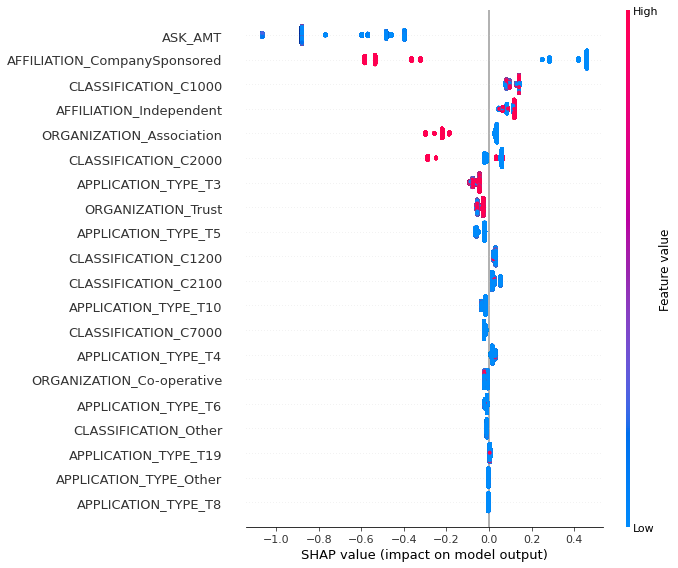

In [25]:
#look at feature importance

import shap

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)
shap.summary_plot(shap_values, X)



In [26]:
# Create the SVM model
svm = SVC(kernel='rbf', C = 0.5, shrinking=True)
# Train the model
svm.fit(X_train_scaled, y_train)
# Evaluate the model
y_pred = svm.predict(X_test_scaled)
print(f" SVM model accuracy: {accuracy_score(y_test,y_pred):.3f}")

 SVM model accuracy: 0.722
